In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
import astropy.units as u
import mapview

# NIKA2-like empty file

Header and WCS copied from NIKA2 ACTJ0215 map.
The RMS map is also the real one from NIKA2 ACTJ0215 observations.

In [3]:
h_in = fits.open("./example_data/NIKA2/nk2_actj0215_15.fits")  # only to get the RMS map of ACTJ0215

In [4]:
my_wcs = wcs.WCS({
    "CTYPE1": "RA---TAN", "CTYPE2": "DEC--TAN",
    "CRVAL1": 180.0, "CRVAL2": 0.0,
    "CDELT1": -3.0 / 3600, "CDELT2": 3.0 / 3600,
    "CRPIX1": 167, "CRPIX2": 167,
    "PC1_1": 1.0, "PC1_2": 0.0, "PC2_1": 0.0, "PC2_2": 1.0,
    "NAXIS": 2, "NAXIS1": 333, "NAXIS2": 333,
})
my_head = my_wcs.to_header()
my_head["UNIT"] = "JY/BEAM"

In [5]:
h_out = fits.HDUList([
    fits.PrimaryHDU(header=my_head),
    fits.ImageHDU(data=np.zeros((333, 333)), header=my_head, name="SZ_MAP"),
    fits.ImageHDU(data=h_in[5].data, header=my_head, name="SZ_RMS")
])
h_out.writeto("./example_data/NIKA2/empty.fits", overwrite=True)

Text(0.5, 0.98, 'SZ RMS [JY/BEAM]')

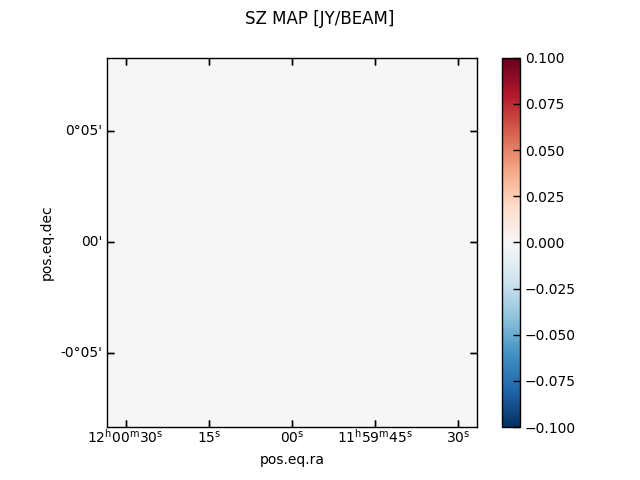

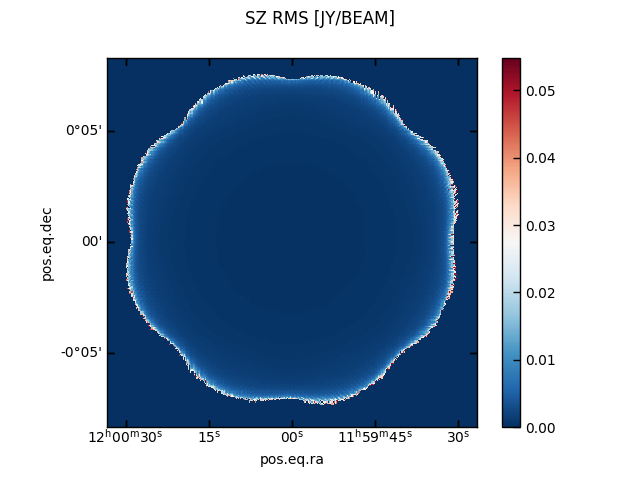

In [6]:
fig, _ = mapview.fitsview("./example_data/NIKA2/empty.fits", 1)
fig.suptitle("SZ MAP [JY/BEAM]")
fig, _ = mapview.fitsview("./example_data/NIKA2/empty.fits", 2)
fig.suptitle("SZ RMS [JY/BEAM]")

# SPT-like empty file

Header and WCS copied from an SPT y-map of El Gordo.
RMS was computed from the standard deviation of this map with sources masked.

In [7]:
my_wcs = wcs.WCS({
    "CTYPE1": "RA---SFL", "CTYPE2": "DEC--SFL",
    "CRVAL1": 180.0, "CRVAL2": 0.0,
    "CD1_1": -15.0 / 3600, "CD2_2": 15.0 / 3600, "CD1_2": 0.0, "CD2_1": 0.0,
    "CRPIX1": 601, "CRPIX2": 601,
    "NAXIS": 2, "NAXIS1": 1201, "NAXIS2": 1201,
})
my_head = my_wcs.to_header()
my_head["UNIT"] = "YSZ"

In [8]:
h_out = fits.HDUList([
    fits.PrimaryHDU(header=my_head),
    fits.ImageHDU(data=np.zeros((1201, 1201)), header=my_head, name="SZ_MAP"),
    fits.ImageHDU(data=np.ones((1201, 1201)) * 9.78e-6, header=my_head, name="SZ_RMS")
])
h_out.writeto("./example_data/SPT/empty.fits", overwrite=True)

Text(0.5, 0.98, 'SZ RMS [YSZ]')

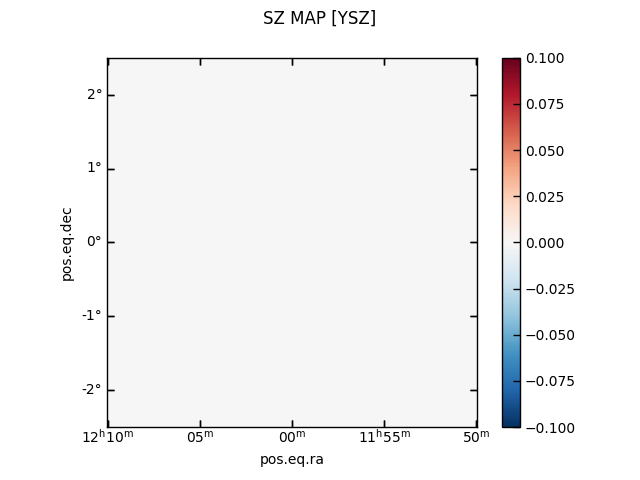

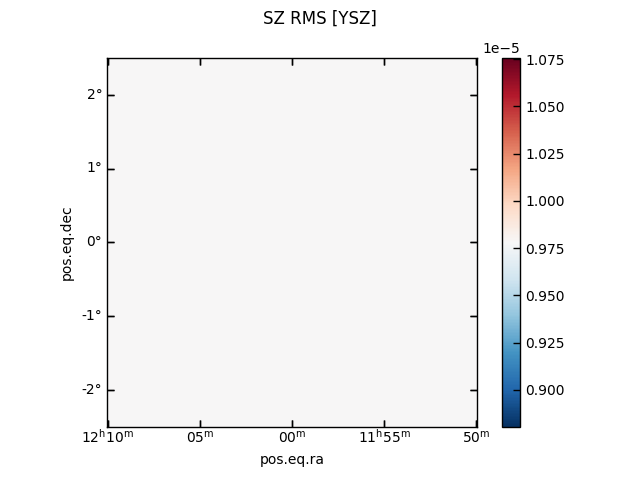

In [9]:
fig, _ = mapview.fitsview("./example_data/SPT/empty.fits", 1)
fig.suptitle("SZ MAP [YSZ]")
fig, _ = mapview.fitsview("./example_data/SPT/empty.fits", 2)
fig.suptitle("SZ RMS [YSZ]")

# Planck-like empty file

Header and WCS improvised, as the Planck y-maps are in Healpix.
RMS is the standard deviation of the noise in the Planck NILC maps, evaluated graphically from the left panel of figure 13 of Planck 2015 XXII (arXiv:1502.01596)

In [10]:
my_wcs = wcs.WCS({
    "CTYPE1": "RA---TAN", "CTYPE2": "DEC--TAN",
    "CRVAL1": 180.0, "CRVAL2": 0.0,
    "CDELT1": -2.0 / 60, "CDELT2": 2.0 / 60,
    "CRPIX1": 31, "CRPIX2": 31,
    "PC1_1": 1.0, "PC1_2": 0.0, "PC2_1": 0.0, "PC2_2": 1.0,
    "NAXIS": 2, "NAXIS1": 61, "NAXIS2": 61,
})
my_head = my_wcs.to_header()
my_head["UNIT"] = "YSZ"

In [11]:
h_out = fits.HDUList([
    fits.PrimaryHDU(header=my_head),
    fits.ImageHDU(data=np.zeros((61, 61)), header=my_head, name="SZ_MAP"),
    fits.ImageHDU(data=np.ones((61, 61)) * 4.12e-6, header=my_head, name="SZ_RMS")
])
h_out.writeto("./example_data/Planck/empty.fits", overwrite=True)

Text(0.5, 0.98, 'SZ RMS [YSZ]')

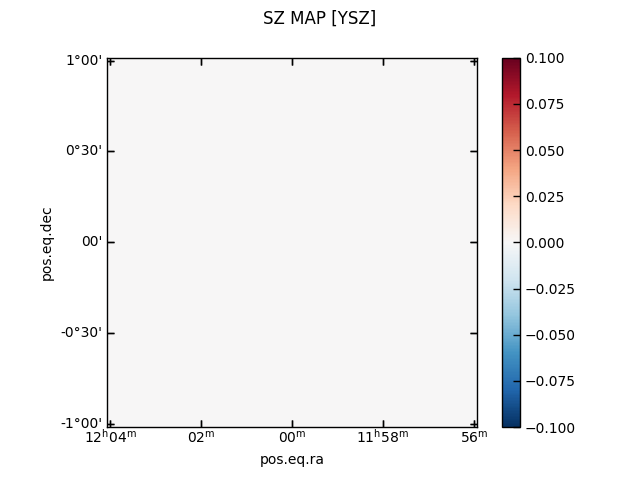

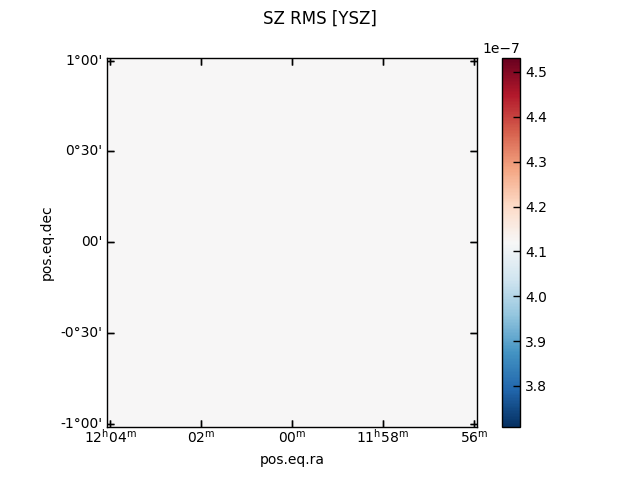

In [12]:
fig, _ = mapview.fitsview("./example_data/Planck/empty.fits", 1)
fig.suptitle("SZ MAP [YSZ]")
fig, _ = mapview.fitsview("./example_data/Planck/empty.fits", 2)
fig.suptitle("SZ RMS [YSZ]")